In [1]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import random
import matplotlib.pyplot as plt
import glob
import numpy as np
import cv2
from collections import namedtuple
%matplotlib inline

### 데이터셋

In [40]:
N_CLASSES = 33
RESIZED_IMAGE = (28, 28)

In [41]:
labels = []
for folder in glob.glob('./data/*') :
    label = folder.split('/')[-1]
    # print(label)
    labels.append(label)

In [42]:
np.array(labels)

array(['no_twowheel', 'no_truck', 'no_straight', 'right_road',
       'traffic_light', 'no_left', 'rock_fall', 'left_road', 'danger',
       'bump', 'height_limit_4.5', 'no_parking',
       'right_shaped_intrsection', 'no_parking_stop', 'no_u_turn',
       'left_shaped_intersection', 'confluence_left', '50', 'no_walker',
       'weight_limit_4.3', 'roundabout', '60', 'yield', 'no_right',
       'no_tracker_and_cart', 'height_limit_4.2', 'height_limit_3.8',
       'no_overrun', 'slow', 'crossroads', 'no_bicycle', '30',
       'height_limit_4.9'], dtype='<U24')

In [43]:
len(labels)

33

In [44]:
# 클래스별 이미지 개수
img_cnt = []
dir_url = './data/'
for label in labels :
    # print(dir_url + label + '/*.jpg')
    # print(glob.glob(dir_url + label + '/*.jpg'))
    cnt = 0
    for file in glob.glob(dir_url + label + '/*.jpg') :
        # print(file)
        cnt += 1
    img_cnt.append(cnt)

In [45]:
np.array(img_cnt)

array([ 935, 1363, 1021, 1032,   16, 2859,  970,  985,   24, 1285, 1219,
       1035,  949, 1875, 1034,   13,  961, 7876,  934,  948,  947, 1608,
         74, 1416,  950, 1130,  953,  931,  125,  941,  925, 1755,  979])

In [46]:
labels_cnt = {}
for label, cnt in zip(labels, img_cnt) :
    # print(label, cnt)
    labels_cnt[label] = cnt

In [47]:
labels_cnt

{'no_twowheel': 935,
 'no_truck': 1363,
 'no_straight': 1021,
 'right_road': 1032,
 'traffic_light': 16,
 'no_left': 2859,
 'rock_fall': 970,
 'left_road': 985,
 'danger': 24,
 'bump': 1285,
 'height_limit_4.5': 1219,
 'no_parking': 1035,
 'right_shaped_intrsection': 949,
 'no_parking_stop': 1875,
 'no_u_turn': 1034,
 'left_shaped_intersection': 13,
 'confluence_left': 961,
 '50': 7876,
 'no_walker': 934,
 'weight_limit_4.3': 948,
 'roundabout': 947,
 '60': 1608,
 'yield': 74,
 'no_right': 1416,
 'no_tracker_and_cart': 950,
 'height_limit_4.2': 1130,
 'height_limit_3.8': 953,
 'no_overrun': 931,
 'slow': 125,
 'crossroads': 941,
 'no_bicycle': 925,
 '30': 1755,
 'height_limit_4.9': 979}

In [48]:
LABELS = {}
for label, i in zip(labels, range(0, N_CLASSES)) :
    # print(i, label)
    LABELS[label] = i

In [49]:
LABELS['no_truck']

1

#### 1. 이미지 전처리

In [50]:
Dataset = namedtuple('Dataset', ['X', 'y'])
print(Dataset)

<class '__main__.Dataset'>


In [51]:
# 텐서플로우에 맞는 이미지 텐서 포맷
# 차원 확장
def to_tf_format(imgs) :
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis = 0).astype(np.float32)

In [52]:
# 한 경로에 주어진 모든 이미지를 읽어서
# 그 이미지를 미리 정의한 형상으로 크기 재조정
# 회색조로 변환
# 레이블을 원 핫 인코딩

def read_dataset(root_path, labels_arr, resize_to) :
    images = []
    labels = []
    
    for label_name in labels_arr :
        # 'data/no_twowheel/''
        full_path = root_path + '/' + label_name + '/'
        
        for img in glob.glob(full_path + '*.jpg') :
            # print(img)
            image = cv2.imread(img).astype(np.float32)
            # 회색조로 변환
            image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)[:, :, 0]
            
            # 크기 조정
            if resize_to :
                image = cv2.resize(image, resize_to)
            
            # 라벨
            label = np.zeros((N_CLASSES, ), dtype = np.float32)
            label[LABELS[label_name]] = 1.0
            
            images.append(image.astype(np.float32))
            labels.append(label)
            
    return Dataset(X = to_tf_format(images).astype(np.float32), y = np.matrix(labels).astype(np.float32))

In [53]:
dataset = read_dataset('data', labels, RESIZED_IMAGE)

In [54]:
print(dataset.X.shape)
print(dataset.y.shape)

(40068, 28, 28, 1)
(40068, 33)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]


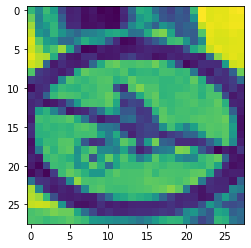

In [55]:
# 첫번째 표본
plt.imshow(dataset.X[0, :, :, :].reshape(RESIZED_IMAGE))
# 레이블
print(dataset.y[0, :])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1.]]


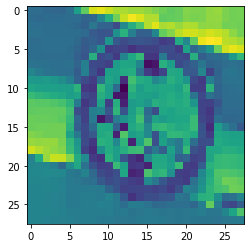

In [56]:
# 마지막 표본
plt.imshow(dataset.X[-1, :, :, :].reshape(RESIZED_IMAGE))
# 레이블
print(dataset.y[-1, :])

In [57]:
from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split( range(dataset.X.shape[0]), test_size = 0.25, random_state = 101 )

In [58]:
len(idx_train), len(idx_test)

(30051, 10017)

In [59]:
X_train = dataset.X[idx_train, :, :, :]
X_test = dataset.X[idx_test, :, :, :]
y_train = dataset.y[idx_train, :]
y_test = dataset.y[idx_test, :]

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30051, 28, 28, 1)
(10017, 28, 28, 1)
(30051, 33)
(10017, 33)


In [61]:
# 훈련 데이터의 미니배치 생성
def minibatcher(X, y, batch_size, shuffle) :
    assert X.shape[0] == y.shape[0]
    n_samples = X.shape[0]
    
    if shuffle :
        idx = np.random.permutation(n_samples)
    else :
        idx = list(range(n_samples))
        
    for k in range(int(np.ceil(n_samples/batch_size))) :
        from_idx = k * batch_size
        to_idx = (k+1) * batch_size
        yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :]

In [62]:
# for mb in minibatcher(X_train, y_train, 1000, True) :
#     print(mb[0].shape, mb[1].shape)

In [63]:
###### model 1 ######

In [64]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [65]:
keep_prob = tf.placeholder(tf.float32)

In [66]:
# input place holders
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 33])

In [67]:
# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [68]:
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

In [69]:
# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

In [70]:
# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [71]:
# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

In [72]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [73]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())

In [75]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(X_train.shape[0] / batch_size)

    for mb in minibatcher(X_train, y_train, batch_size, True) :
        feed_dict = {X: mb[0], Y: mb[1], keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: logits and labels must be broadcastable: logits_size=[100,10] labels_size=[100,33]
	 [[node softmax_cross_entropy_with_logits_sg (defined at <ipython-input-72-59760605644a>:2) ]]
  (1) Invalid argument: logits and labels must be broadcastable: logits_size=[100,10] labels_size=[100,33]
	 [[node softmax_cross_entropy_with_logits_sg (defined at <ipython-input-72-59760605644a>:2) ]]
	 [[Mean/_13]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'softmax_cross_entropy_with_logits_sg':
  File "/home/team2/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/team2/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/team2/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/team2/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/team2/anaconda3/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/home/team2/anaconda3/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/home/team2/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 378, in dispatch_queue
    yield self.process_one()
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 714, in __init__
    self.run()
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/team2/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-72-59760605644a>", line 2, in <module>
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 324, in new_func
    return func(*args, **kwargs)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py", line 3245, in softmax_cross_entropy_with_logits
    labels=labels, logits=logits, axis=dim, name=name)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py", line 3050, in softmax_cross_entropy_with_logits_v2
    labels=labels, logits=logits, axis=axis, name=name)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py", line 3151, in softmax_cross_entropy_with_logits_v2_helper
    precise_logits, labels, name=name)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 10970, in softmax_cross_entropy_with_logits
    name=name)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/home/team2/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: X_test, Y: y_test, keep_prob: 1}))

# Get one and predict
r = random.randint(0, y_test.shape[0] - 1)
print("Label: ", sess.run(tf.argmax(y_test[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: X_test[r:r + 1], keep_prob: 1}))

plt.imshow(X_test[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()